In [2]:
# Install necessary libraries (only if needed)
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to Pandas DataFrame
df = dataset['train'].to_pandas()

# Check if 'job_posted_date' exists
if 'job_posted_date' in df.columns:
    df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Ensure 'job_skills' exists and convert it properly
if 'job_skills' in df.columns:
    df['job_skills'] = df['job_skills'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x
    )
# Filter for Data Analyst data
    df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
# Only get data analysts job in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
#Drop NaN Values from 'Salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


In [6]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [7]:
df_DA_US_Group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_Group.sort_values(by='median', ascending = False).head(10)

df_DA_skills = df_DA_US_Group.sort_values(by = 'count', ascending = False).head(10).sort_values(by='median', ascending = False)

df_DA_skills


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [10]:
import seaborn as sns

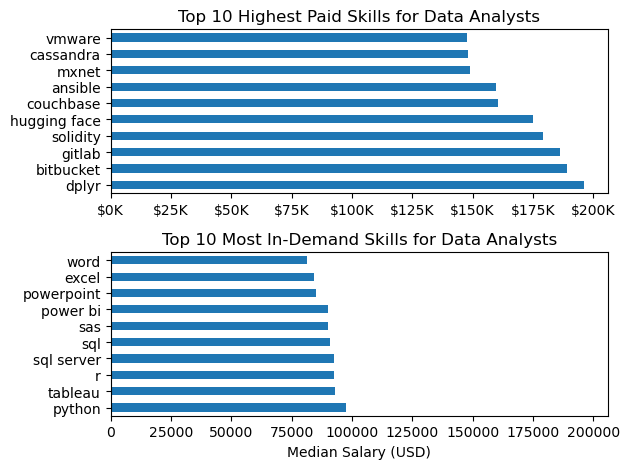

In [8]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Match x-axis limits

fig.tight_layout()
plt.tight_layout()  # Optional: Adjust spacing between subplots
plt.show()